# Project price cars prediction
KUBIK Aleksander - KOBANA Johan - JOUYIT Matthieu - DIA4*

Our problem : We want to be able to predict the price of a used car on the market, thanks to its different caracteristics

# Part 1

### 1: Data Visualization

In [83]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [84]:
# Charging data
cars = pd.read_csv('data.csv')

* __Displaying all columns of the Cars dataframe :__

In [85]:
cars.columns

Index(['Unnamed: 0', 'brand', 'model', 'color', 'registration_date', 'year',
       'price_in_euro', 'power_kw', 'power_ps', 'transmission_type',
       'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km',
       'mileage_in_km', 'offer_description'],
      dtype='object')

* __Displaying the variable types of all columns in the Cars dataframe :__
The purpose is to identify quantitative variables (int or float) and categorical variables (object) in order to determine how to analyze the data.

In [86]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

* __Visualization and macro-level analysis of the data :__ 

Descriptive statistics of quantitative variables :

In [87]:
cars.describe()

,Unnamed: 0,mileage_in_km
count,251079.000000,2.509270e+05
mean,125539.000000,8.534002e+04
std,72480.408456,7.871706e+04
min,0.000000,0.000000e+00
25%,62769.500000,2.490400e+04
50%,125539.000000,6.750000e+04
75%,188308.500000,1.265000e+05
max,251078.000000,3.800000e+06


In [88]:
# Cleaning and setting datetime for registration_date and year
cars = cars[cars['registration_date'].str.match(r'^(0[1-9]|1[0-2])/[0-9]{4}$', na=False)]
cars['registration_date'] = pd.to_datetime(cars['registration_date'], format='%m/%Y')

cars['year'] = pd.to_datetime(cars['year'], format='%Y')

In [89]:
# Convert selected columns to numeric types (non-numeric values become NaN)
cols_to_numeric = [
    'price_in_euro',
    'power_kw',
    'power_ps',
    'fuel_consumption_l_100km',
    'fuel_consumption_g_km',
    'mileage_in_km'
]

for col in cols_to_numeric:
    cars[col] = pd.to_numeric(cars[col], errors='coerce')

In [90]:
# Identification of quantitative variables
num_cols = cars.select_dtypes(include=['int64','float64']).columns
print(num_cols)

Index(['Unnamed: 0', 'price_in_euro', 'power_kw', 'power_ps',
       'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km'],
      dtype='object')


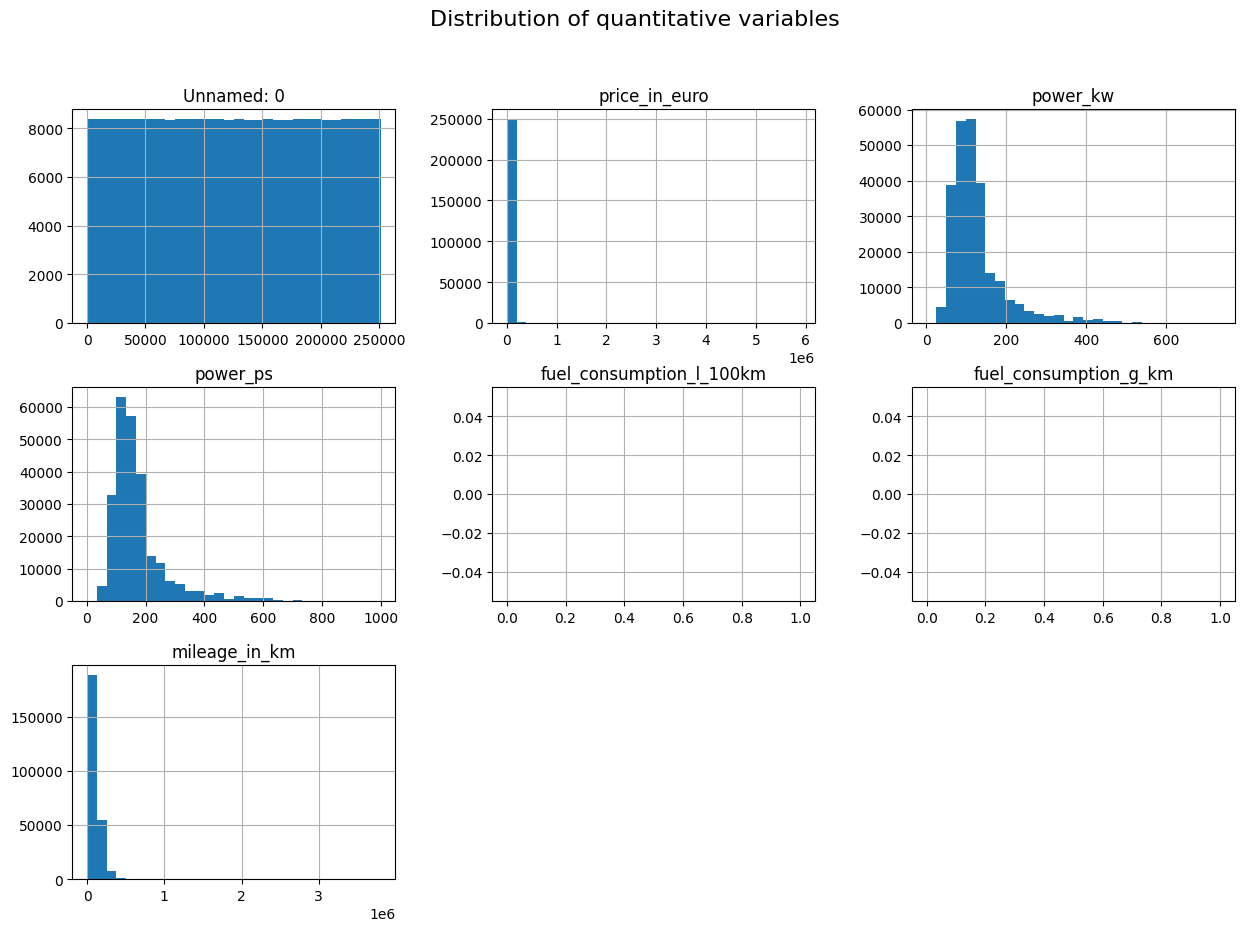

In [91]:
# Histograms of quantitative variables
cars[num_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Distribution of quantitative variables", fontsize=16)
plt.show()

Descriptive statistics of categorical variables :

In [94]:
cars.describe(include=object)

,brand,model,color,transmission_type,fuel_type,offer_description
count,250880,250880,250714,250880,250880,250880
unique,47,1312,14,4,11,200804
top,volkswagen,Volkswagen Golf,black,Automatic,Petrol,Titanium
freq,33263,7586,58686,131640,143280,173


Index(['brand', 'model', 'color', 'transmission_type', 'fuel_type',
       'offer_description'],
      dtype='object')


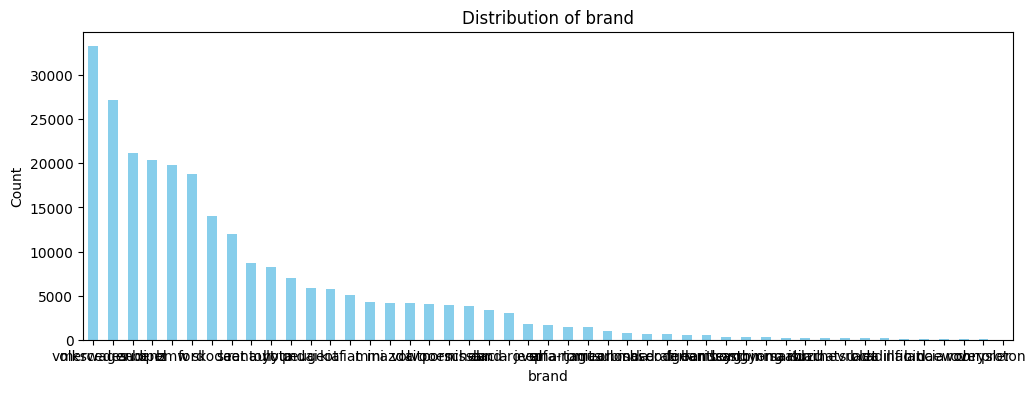

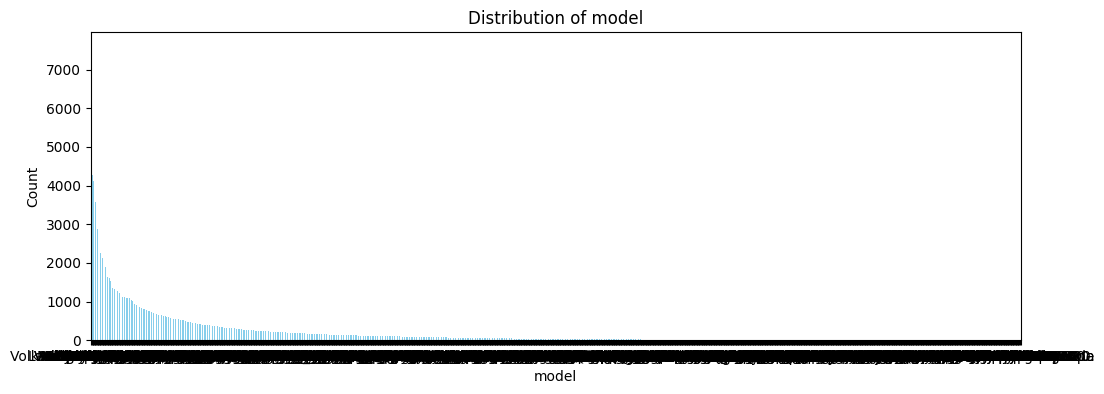

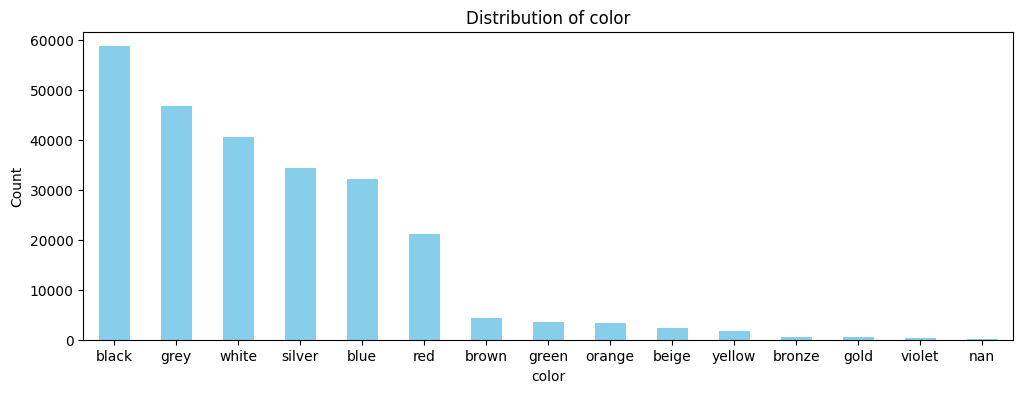

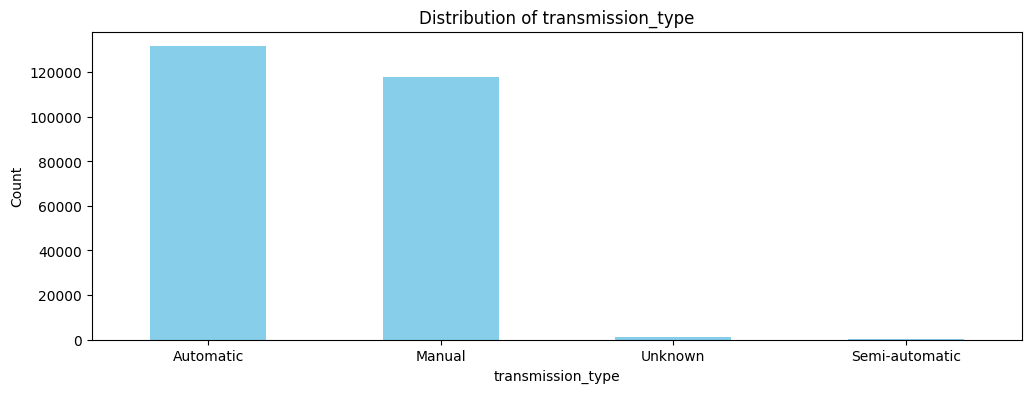

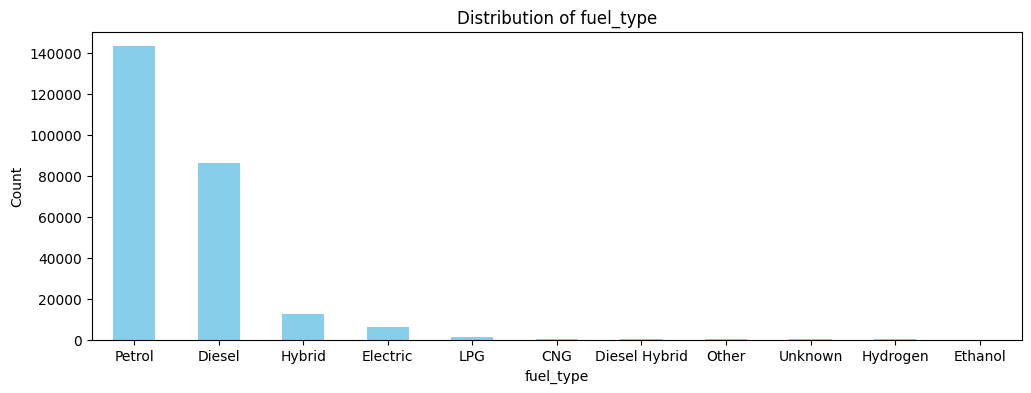

/Users/Joko/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Joko/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Joko/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:
# Identification of categorical variables
cat_cols = cars.select_dtypes(include=['object']).columns
print(cat_cols)

# Histograms of categorical variables (excluding the variable PolicyId)
for col in cat_cols:
    plt.figure(figsize=(12,4))
    cars[col].value_counts(dropna=False).plot.bar(rot=0, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

### 2: Cleaning and analysis of quantitative data 

### 3: Cleaning and analysis of categorical data 